In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import numpy as np
import pandas as pd

In [2]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [5]:
Measurement = Base.classes.measurements

In [6]:
Station = Base.classes.stations

In [7]:
session = Session(engine)

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [9]:
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c['type'])

measurement_ID INTEGER
station VARCHAR
date TEXT
prcp FLOAT
tobs INTEGER


In [10]:
same_station = session.query(Measurement, Station).filter(Measurement.station == Station.station).limit(10).all()

for record in same_station:
    (measurements, stations) = record
    print(record)
    

(<sqlalchemy.ext.automap.measurements object at 0x00000181A3BD34A8>, <sqlalchemy.ext.automap.stations object at 0x00000181A3BD33C8>)
(<sqlalchemy.ext.automap.measurements object at 0x00000181A3BD3320>, <sqlalchemy.ext.automap.stations object at 0x00000181A3BD33C8>)
(<sqlalchemy.ext.automap.measurements object at 0x00000181A3BD3390>, <sqlalchemy.ext.automap.stations object at 0x00000181A3BD33C8>)
(<sqlalchemy.ext.automap.measurements object at 0x00000181A5DCE5F8>, <sqlalchemy.ext.automap.stations object at 0x00000181A3BD33C8>)
(<sqlalchemy.ext.automap.measurements object at 0x00000181A5DCE668>, <sqlalchemy.ext.automap.stations object at 0x00000181A3BD33C8>)
(<sqlalchemy.ext.automap.measurements object at 0x00000181A5DCE710>, <sqlalchemy.ext.automap.stations object at 0x00000181A3BD33C8>)
(<sqlalchemy.ext.automap.measurements object at 0x00000181A5DCE7B8>, <sqlalchemy.ext.automap.stations object at 0x00000181A3BD33C8>)
(<sqlalchemy.ext.automap.measurements object at 0x00000181A5DCE860>, 

In [11]:
#Honolulu precipitation data for 12 months
honolulu = session.query(Station).filter(Station.name == 'HONOLULU OBSERVATORY 702.2, HI US').all()
for city_id in honolulu:
    print("Station: {0}, Name: {1}".format(city_id.station, city_id.name))

Station: USC00511918, Name: HONOLULU OBSERVATORY 702.2, HI US


In [12]:
import datetime as dt

In [13]:
query_begin_date = session.query(Measurement.date).order_by(Measurement.date.desc()).filter (Measurement.station =='USC00511918').first()

In [14]:
date_str = "30"
year_honolulu_dates = session.query(Measurement.date).\
    filter(func.strftime("%d", Measurement.date) == date_str).order_by(Measurement.date.desc()).filter (Measurement.station =='USC00511918').limit(12).all()
year_honolulu_dates

[('2015-10-30'),
 ('2015-04-30'),
 ('2015-01-30'),
 ('2014-12-30'),
 ('2014-11-30'),
 ('2014-10-30'),
 ('2014-09-30'),
 ('2014-08-30'),
 ('2014-07-30'),
 ('2014-06-30'),
 ('2014-05-30'),
 ('2014-04-30')]

In [15]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >'2014-04-30').filter(Measurement.date <'2015-10-30').\
    order_by(Measurement.date.desc()).filter(Measurement.station =='USC00511918').all()
results

[('2015-10-29', 0.0),
 ('2015-10-28', 0.0),
 ('2015-10-26', 0.1),
 ('2015-10-25', 0.0),
 ('2015-10-22', 0.15),
 ('2015-10-21', 0.0),
 ('2015-10-20', 0.3),
 ('2015-10-19', 0.0),
 ('2015-10-16', 0.0),
 ('2015-10-15', 0.0),
 ('2015-10-14', 0.0),
 ('2015-10-13', 0.4),
 ('2015-10-12', 0.0),
 ('2015-10-09', 0.0),
 ('2015-10-08', 0.0),
 ('2015-09-25', 0.0),
 ('2015-09-24', 0.0),
 ('2015-09-23', 0.0),
 ('2015-09-22', 0.0),
 ('2015-09-18', 0.0),
 ('2015-09-17', 0.0),
 ('2015-09-04', 0.7),
 ('2015-09-03', 0.2),
 ('2015-09-02', 0.0),
 ('2015-09-01', 0.0),
 ('2015-08-26', 0.8),
 ('2015-08-25', 1.3),
 ('2015-08-20', 0.1),
 ('2015-08-14', 0.0),
 ('2015-08-06', 0.0),
 ('2015-08-05', 0.1),
 ('2015-08-04', 0.0),
 ('2015-07-31', 0.0),
 ('2015-07-28', 0.0),
 ('2015-07-24', 0.0),
 ('2015-07-23', 0.0),
 ('2015-07-22', 0.0),
 ('2015-07-17', 0.0),
 ('2015-07-16', 0.0),
 ('2015-07-15', 0.0),
 ('2015-07-14', 0.0),
 ('2015-07-10', 0.0),
 ('2015-07-09', 0.0),
 ('2015-06-26', 0.01),
 ('2015-06-25', 0.01),
 ('2015

In [16]:
prcp_df = pd.DataFrame(results)
prcp_df.head()


,date,prcp
0,2015-10-29,0.00
1,2015-10-28,0.00
2,2015-10-26,0.10
3,2015-10-25,0.00
4,2015-10-22,0.15


In [17]:
prcp_df.columns


Index(['date', 'prcp'], dtype='object')

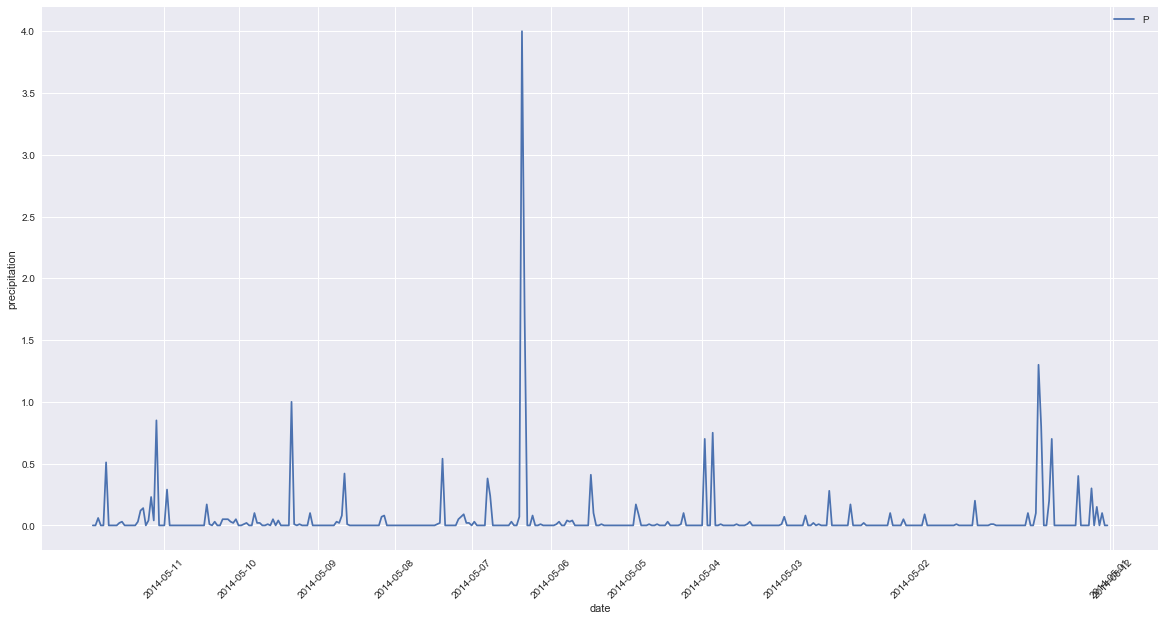

In [32]:
y_axis = prcp_df['prcp']
x = prcp_df['date']
plt.figure(figsize=(20,10))
plt.plot(x, y_axis)
plt.legend('Precipitation')
plt.xlabel('date')
plt.ylabel('precipitation')
plt.xticks(['2015-10-30','2015-04-30','2015-01-30','2014-12-30','2014-11-30','2014-10-30','2014-09-30','2014-08-30','2014-07-30','2014-06-30','2014-05-30','2014-04-30'], rotation = 45)
plt.show()

In [127]:
prcp_summ_stats = prcp_df['prcp'].describe()
#prcp_summ_stats
prcp_summ_stats_df = round(pd.DataFrame(prcp_summ_stats), 2)
prcp_summ_stats_df

,prcp
count,384.00
mean,0.05
std,0.26
min,0.00
25%,0.00
50%,0.00
75%,0.01
max,4.00


In [19]:
stations_count= session.query(Measurement.station).group_by(Measurement.station).count()
print( stations_count)

9


In [20]:
station_tobs= session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
           order_by(func.count(Measurement.date).desc()).all()
print(station_tobs)

[('USC00519281', 2772), ('USC00513117', 2696), ('USC00519397', 2685), ('USC00519523', 2572), ('USC00516128', 2484), ('USC00514830', 1937), ('USC00511918', 1932), ('USC00517948', 683), ('USC00518838', 342)]


In [21]:
highest_tobcount_city = session.query(Station).filter(Station.station == 'USC00519281').all()
for station_name in highest_tobcount_city:
    print("The station that has highest temparature observation count is: {1}".format(station_name.station, station_name.name))

The station that has highest temparature observation count is: WAIHEE 837.5, HI US


In [104]:
results_tobs = session.query( Measurement.date,Measurement.tobs).filter(Measurement.date >'2014-04-30').filter(Measurement.date <'2015-10-30').\
    order_by(Measurement.date.desc()).filter(Measurement.station =='USC00511918').all()
results_tobs

[('2015-10-29', 68),
 ('2015-10-28', 82),
 ('2015-10-26', 72),
 ('2015-10-25', 74),
 ('2015-10-22', 71),
 ('2015-10-21', 71),
 ('2015-10-20', 75),
 ('2015-10-19', 71),
 ('2015-10-16', 72),
 ('2015-10-15', 72),
 ('2015-10-14', 72),
 ('2015-10-13', 72),
 ('2015-10-12', 73),
 ('2015-10-09', 84),
 ('2015-10-08', 83),
 ('2015-09-25', 77),
 ('2015-09-24', 76),
 ('2015-09-23', 77),
 ('2015-09-22', 76),
 ('2015-09-18', 74),
 ('2015-09-17', 71),
 ('2015-09-04', 73),
 ('2015-09-03', 76),
 ('2015-09-02', 76),
 ('2015-09-01', 78),
 ('2015-08-26', 76),
 ('2015-08-25', 79),
 ('2015-08-20', 75),
 ('2015-08-14', 78),
 ('2015-08-06', 76),
 ('2015-08-05', 76),
 ('2015-08-04', 84),
 ('2015-07-31', 82),
 ('2015-07-28', 74),
 ('2015-07-24', 77),
 ('2015-07-23', 71),
 ('2015-07-22', 77),
 ('2015-07-17', 75),
 ('2015-07-16', 75),
 ('2015-07-15', 71),
 ('2015-07-14', 75),
 ('2015-07-10', 73),
 ('2015-07-09', 76),
 ('2015-06-26', 71),
 ('2015-06-25', 70),
 ('2015-06-24', 73),
 ('2015-06-23', 75),
 ('2015-06-19

In [106]:
tobs_df = pd.DataFrame(results_tobs)
tobs_df.head()

,date,tobs
0,2015-10-29,68
1,2015-10-28,82
2,2015-10-26,72
3,2015-10-25,74
4,2015-10-22,71


<IPython.core.display.Javascript object>


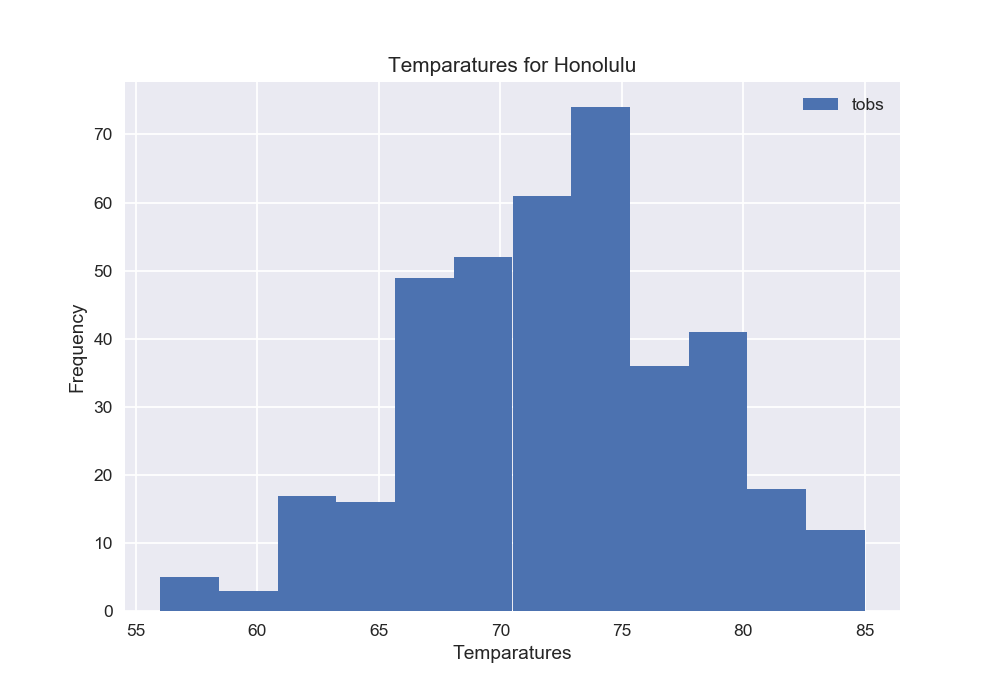

In [114]:
tobs_df.plot.hist(stacked =True, bins = 12)
plt.xlabel('Temparatures')
plt.title('Temparatures for Honolulu')
plt.show()

In [26]:
start_date = dt.datetime(2017, 1, 1)
end_date = dt.datetime(2018, 1, 1)
calc_temps = session.query(func.max(Measurement.tobs), func.avg(Measurement.tobs), func.min(Measurement.tobs)).\
                           filter(Measurement.date > start_date).filter(Measurement.date < end_date).all()
temp_ranges = list(np.ravel(calc_temps))
temp_ranges


[87.0, 74.04278922345483, 58.0]

In [27]:
# avg_temp = [result[1] for result in temp_ranges]
avg_temp = temp_ranges[1]
avg_temp

74.04278922345483

In [75]:
temp_ranges_df = pd.DataFrame(temp_ranges)
se_t = temp_ranges_df.sem()
se_t

0    8.38736
dtype: float64

<IPython.core.display.Javascript object>


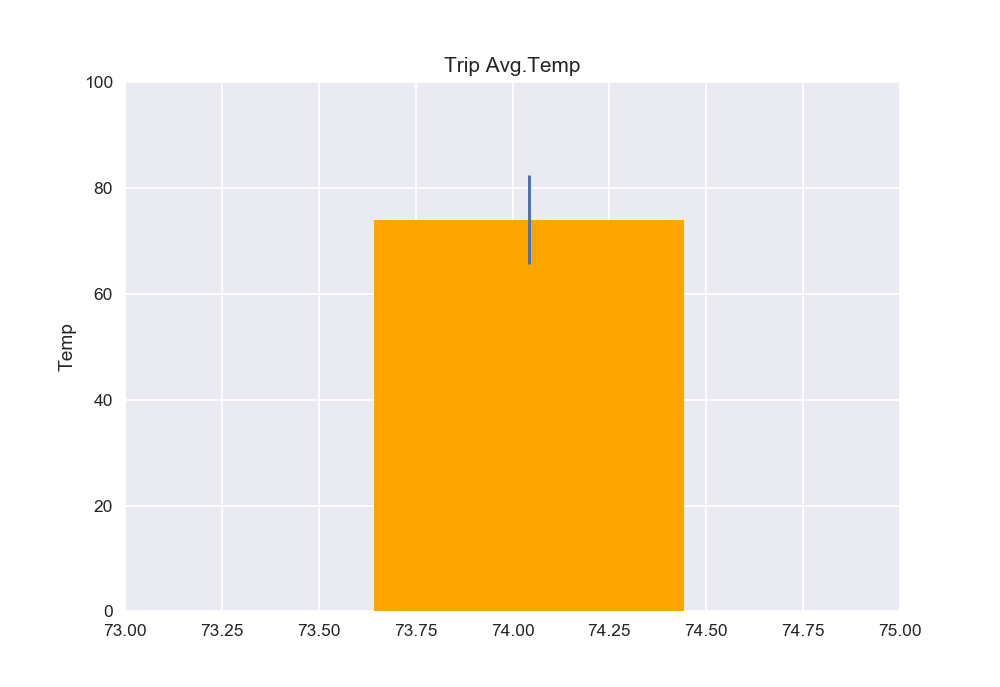

In [123]:
y= avg_temp
x= np.arange(avg_temp)
yerr =se_t
plt.title("Trip Avg.Temp")
plt.ylabel("Temp")
plt.bar(avg_temp,x, color = 'orange')
plt.errorbar(avg_temp,y,yerr)
plt.xlim(73,75)
plt.ylim(0,100)
plt.show()